# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('/data/condemn.txt')
condemnations.shape

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,8,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(32586, 40)

In [2]:
pd.set_option('display.max_columns', None)

condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,StDir,StName,StType,InspectDate,InspectType,CondLetterSent,Status,OwnerCompany,OwnerName,OwnerAddr,OwnerCity,OwnerState,OwnerZIP,GeoCityBLockPart,Ward00,Precinct02,Nbrhd,CDADist,CDASubDist,PoliceDist,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,,COTTAGE,AV,1986-07-10 00:00:00,CB,1986-07-15 00:00:00,W,NaN,Hughie Richard Naylor,5080 Geraldine,St. Louis,MO,63115,3652.00,4.0,3.0,56.0,13.0,26.0,5.0,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,,GEYER,AV,2009-07-23 00:00:00,CB,2009-07-23 00:00:00,B,NaN,"Ganz, Joseph R",906 Geyer Ave,St. Louis,MO,63104,666.00,7.0,12.0,21.0,8.0,16.0,3.0,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,,MARYLAND,AV,2003-08-06 00:00:00,CD,2003-08-12 00:00:00,NaN,NaN,Charles Bass,5015 Cates Ave.,St. Louis,MO,63108,3913.01,18.0,1.0,38.0,11.0,23.0,5.0,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,,COOK,AV,1996-06-17 00:00:00,CD,1996-06-24 00:00:00,W,Richard Burruss Ministries,"Richard Burruss, Pres.",4100 Page Blvd.,St. Louis,MO,63113,3744.00,19.0,13.0,58.0,13.0,25.0,5.0,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,,ST LOUIS,AV,2006-12-20 00:00:00,CD,2006-12-27 00:00:00,NaN,N & G ventures LC,"Harvey Noble, Owner",515 Olive St.Ste.1608,St. Louis,MO,63101,1103.00,5.0,13.0,60.0,14.0,6.0,4.0,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [3]:
condemnations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AcctNum           28985 non-null  float64
 1   PrclErr           28985 non-null  float64
 2   AddrAdjusted      28985 non-null  object 
 3   CityBlock         28985 non-null  float64
 4   Parcel            28985 non-null  float64
 5   OwnerCode         28985 non-null  float64
 6   Handle            32585 non-null  float64
 7   Parcel9           32585 non-null  float64
 8   AddrNum           32585 non-null  object 
 9   AddrSuf           29006 non-null  object 
 10  StDir             28985 non-null  object 
 11  StName            32585 non-null  object 
 12  StType            32503 non-null  object 
 13  InspectDate       32584 non-null  object 
 14  InspectType       32583 non-null  object 
 15  CondLetterSent    32119 non-null  object 
 16  Status            25462 non-null  object

In [4]:
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'],format='%Y-%m-%d')

In [5]:
condemnations = condemnations[(condemnations['InspectDate']>='1986-01-01') & (condemnations['InspectDate']<'2015-01-01')]

In [7]:
condemnations.shape

(30232, 40)

In [8]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [9]:
condemnations['year'] = pd.DatetimeIndex(condemnations['InspectDate']).year

In [10]:
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,StDir,StName,StType,InspectDate,InspectType,CondLetterSent,Status,OwnerCompany,OwnerName,OwnerAddr,OwnerCity,OwnerState,OwnerZIP,GeoCityBLockPart,Ward00,Precinct02,Nbrhd,CDADist,CDASubDist,PoliceDist,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo,year
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,,COTTAGE,AV,1986-07-10,CB,1986-07-15 00:00:00,W,NaN,Hughie Richard Naylor,5080 Geraldine,St. Louis,MO,63115,3652.00,4.0,3.0,56.0,13.0,26.0,5.0,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN,1986
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,,GEYER,AV,2009-07-23,CB,2009-07-23 00:00:00,B,NaN,"Ganz, Joseph R",906 Geyer Ave,St. Louis,MO,63104,666.00,7.0,12.0,21.0,8.0,16.0,3.0,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN,2009
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,,MARYLAND,AV,2003-08-06,CD,2003-08-12 00:00:00,NaN,NaN,Charles Bass,5015 Cates Ave.,St. Louis,MO,63108,3913.01,18.0,1.0,38.0,11.0,23.0,5.0,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN,2003
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,,COOK,AV,1996-06-17,CD,1996-06-24 00:00:00,W,Richard Burruss Ministries,"Richard Burruss, Pres.",4100 Page Blvd.,St. Louis,MO,63113,3744.00,19.0,13.0,58.0,13.0,25.0,5.0,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN,1996
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,,ST LOUIS,AV,2006-12-20,CD,2006-12-27 00:00:00,NaN,N & G ventures LC,"Harvey Noble, Owner",515 Olive St.Ste.1608,St. Louis,MO,63101,1103.00,5.0,13.0,60.0,14.0,6.0,4.0,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN,2006


In [11]:
import numpy as np
by_year = condemnations.pivot_table(
    values='AcctNum', 
    index='year', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0)

In [12]:
by_year.head()

Status,B,L,R,W
year,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322


In [13]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


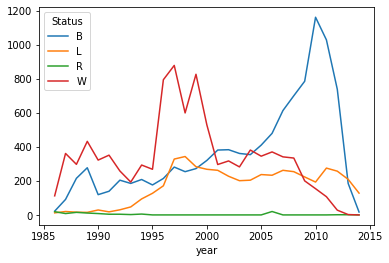

In [14]:
%matplotlib inline
by_year.plot()

---

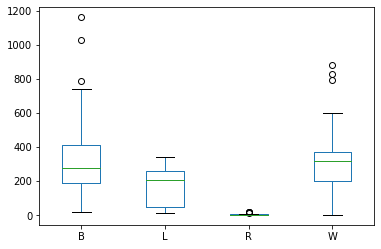

In [18]:
by_year.plot(kind='box')

From the line and box plot from above we can see status B has highest distribution followed by W, L, and R.

Status W is the highest from 1985 - 2001

Status B is the hifhest from 2002 - 2013

Status R seems like is about 0 from 1985-2015

Seems like all the statuses are getting closer to 0 as we get closer 2015

# some extra data visualizations

In [17]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')  


In [18]:
by_year.index

Int64Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='year')

# area plot

Text(0.5, 0, 'Years')

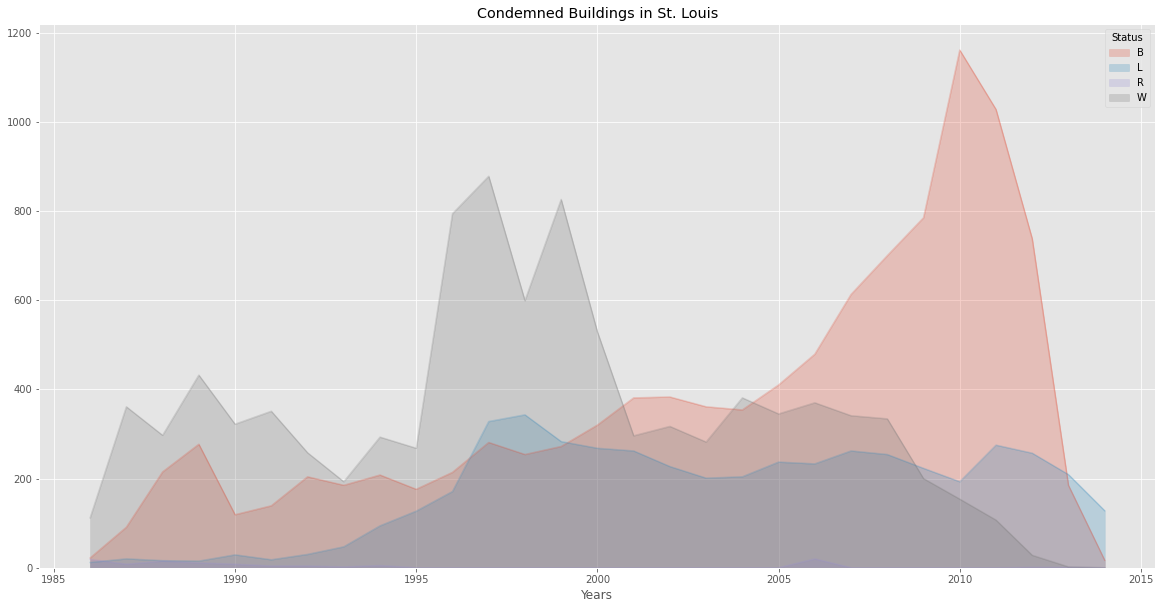

In [22]:
by_year.plot(kind='area',
             alpha=0.25,
             stacked=False,
             figsize=(20, 10))  

plt.title('Condemned Buildings in St. Louis')
plt.xlabel('Years')



# Histogram

Text(0.5, 1.0, 'Condemned Buildings in St. Louis')

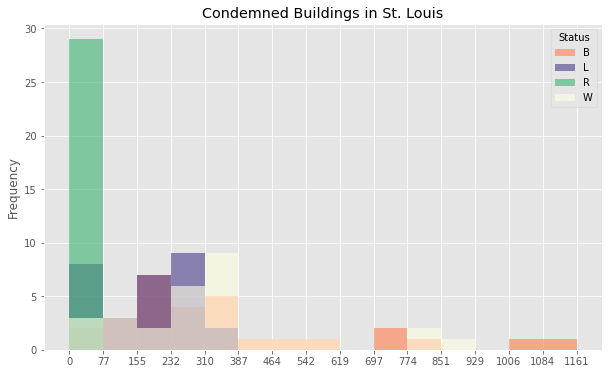

In [34]:
count, bin_edges = np.histogram(by_year, 15)

by_year.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen','lightyellow'])
plt.title('Condemned Buildings in St. Louis')


Text(0.5, 1.0, 'Condemned Buildings in St. Louis')

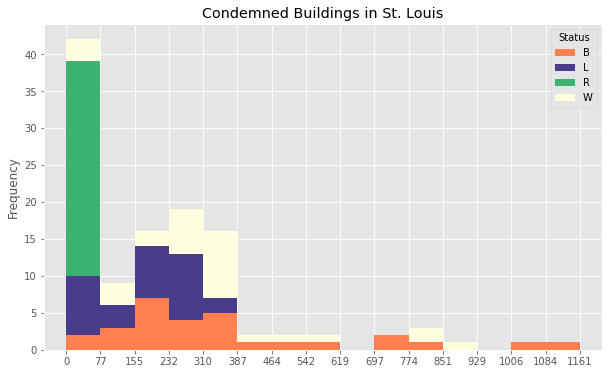

In [35]:
count, bin_edges = np.histogram(by_year, 15)
xmin = bin_edges[0] - 50 
xmax = bin_edges[-1] + 50 

# stacked Histogram
by_year.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen','lightyellow'],
          stacked=True,
          xlim=(xmin, xmax)
         )
plt.title('Condemned Buildings in St. Louis')


# Bar Charts

Text(0.5, 1.0, 'Condemned Buildings in St. Louis')

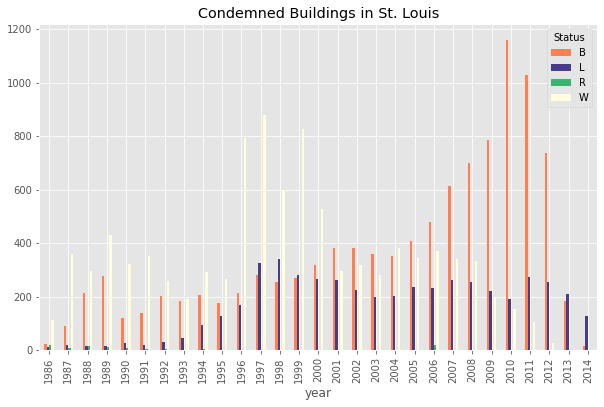

In [40]:
by_year.plot(kind='bar', figsize=(10, 6),color=['coral', 'darkslateblue', 'mediumseagreen','lightyellow'])
plt.title('Condemned Buildings in St. Louis')


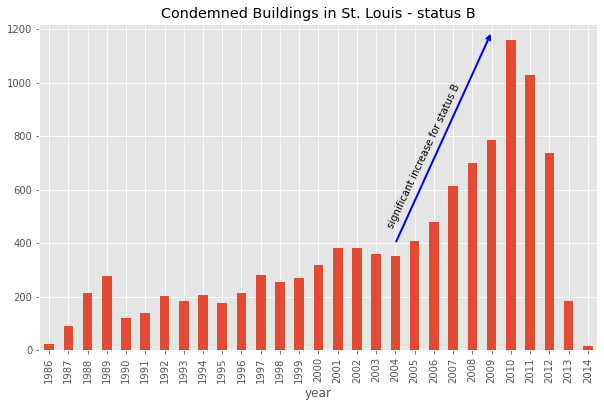

In [70]:
by_year['B'].plot(kind='bar', figsize=(10, 6), rot=90)
plt.title('Condemned Buildings in St. Louis - status B')
# Annotate arrow
plt.annotate('',  
             xy=(23, 1190),  
             xytext=(18, 400),  
             xycoords='data',  
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
# Annotate Text
plt.annotate('significant increase for status B',  # text to display
             xy=(17.5, 450),  
             rotation=65,  
             va='bottom',  
             ha='left',  
             )
plt.show()

Text(15.5, 450, 'significant decrease for status W')

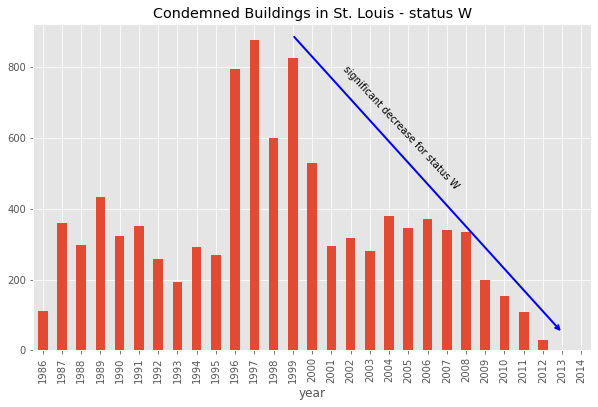

In [88]:
by_year['W'].plot(kind='bar', figsize=(10, 6), rot=90)
plt.title('Condemned Buildings in St. Louis - status W')
plt.annotate('',  
             xy=(27, 50),  
             xytext=(13, 890),  
             xycoords='data',  
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
plt.annotate('significant decrease for status W',  # text to display
             xy=(15.5, 450),  
             rotation=-47,  
             va='bottom',  
             ha='left',  
             )

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [19]:
import pandas as pd
meetings = pd.read_csv('/data/meetings.csv')

In [21]:
meetings['startDate'] = pd.to_datetime(meetings['start_time'],format='%Y-%m-%d')

In [24]:
df_before_covid =meetings[(meetings['startDate']>='2020-02-17') & (meetings['startDate']<'2020-02-29')]

In [25]:
#total meeting duration for each person before covid
df_before_covid_meetingDuration =df_before_covid.groupby('userName')['meetingDurationMinutes'].sum().reset_index()

In [26]:
df_during_covid =meetings[(meetings['startDate']>='2020-03-16') & (meetings['startDate']<'2020-03-28')]

In [27]:
#total meeting duration for each person during covid
df_during_covid_meetingDuration = df_during_covid.groupby('userName')['meetingDurationMinutes'].sum().reset_index()

In [28]:
df_before_covid_meetingDuration.rename({'meetingDurationMinutes':'BEEFORE'},axis=1, inplace=True)

In [29]:
df_during_covid_meetingDuration.rename({'meetingDurationMinutes':'DURING'},axis=1, inplace=True)

In [30]:
summary = df_before_covid_meetingDuration.merge(df_during_covid_meetingDuration, how='outer', on=['userName'])

In [32]:
summary['pctChange']= ((summary['DURING']-summary['BEEFORE'])/summary['BEEFORE']) 

In [34]:
summary

,userName,BEEFORE,DURING,pctChange
0,Drew.Marco,557.8833,1010.8166,0.811878
1,amit.bhagat,821.2001,1431.3163,0.742957
2,andrea.bryant.amitechsolutions,119.5501,72.7167,-0.391747
3,angie.warren,45.1166,314.6667,5.974522
4,chris.rogers.amitechsolutions,383.3999,23.1833,-0.939532
5,eric.keeney,1101.2834,794.0168,-0.279008
6,eric.rodman,166.5833,387.8168,1.328065
7,jeff.hatfield.amitechsolutions,142.5835,1197.0667,7.395549
8,jennifer.patton.amitechs,346.8167,158.0666,-0.544236
9,jessica.sikora,78.3167,349.2999,3.460095


---

In [36]:
summary['pctChange'].mean().round(2)

2.44

In [37]:
len(summary)

22

In [35]:
assert(len(summary) == 22)

In [ ]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
